In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Data**

In [3]:
df=pd.read_csv("olympics_data.csv")

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [6]:
df.shape

(70000, 15)

In [7]:
df.describe(include=['object'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


**Data Cleaning**

In [8]:
df.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [9]:
df.duplicated().sum()

383

In [10]:
df=df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

**Visualization and Analysis**

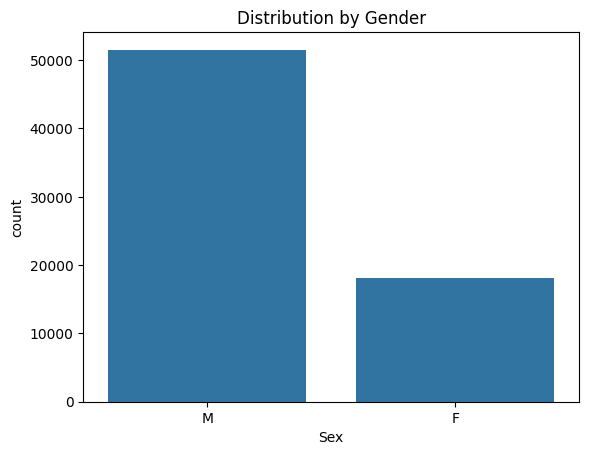

In [12]:
sns.countplot(data=df,x='Sex')
plt.title('Distribution by Gender')
plt.show()

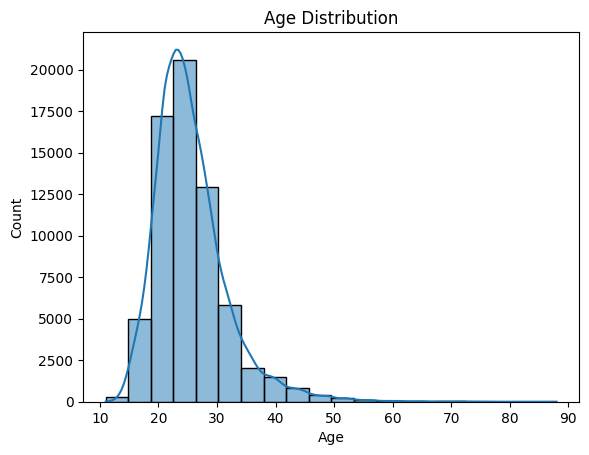

In [13]:
sns.histplot(data=df,x='Age',bins=20,kde=True)
plt.title("Age Distribution")
plt.show()

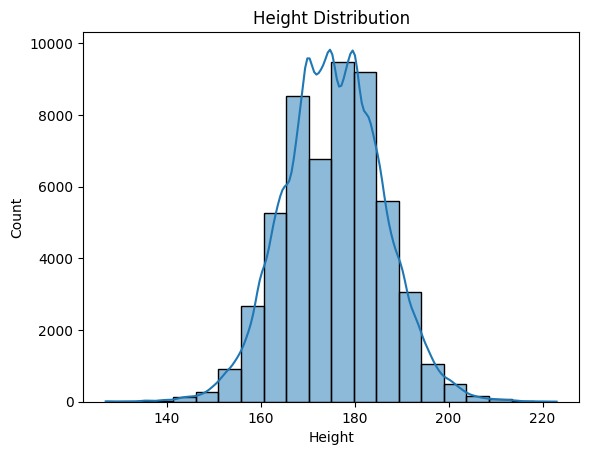

In [14]:
sns.histplot(data=df,x='Height',bins=20,kde=True)
plt.title("Height Distribution")
plt.show()

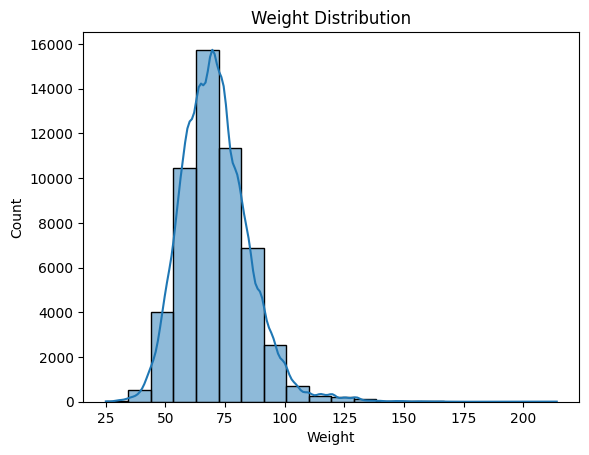

In [15]:
sns.histplot(data=df,x='Weight',bins=20,kde=True)
plt.title("Weight Distribution")
plt.show()

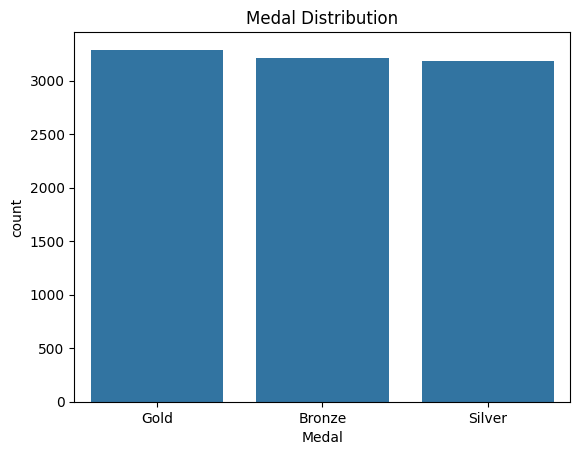

In [16]:
sns.countplot(data=df,x='Medal')
plt.title("Medal Distribution")
plt.show()

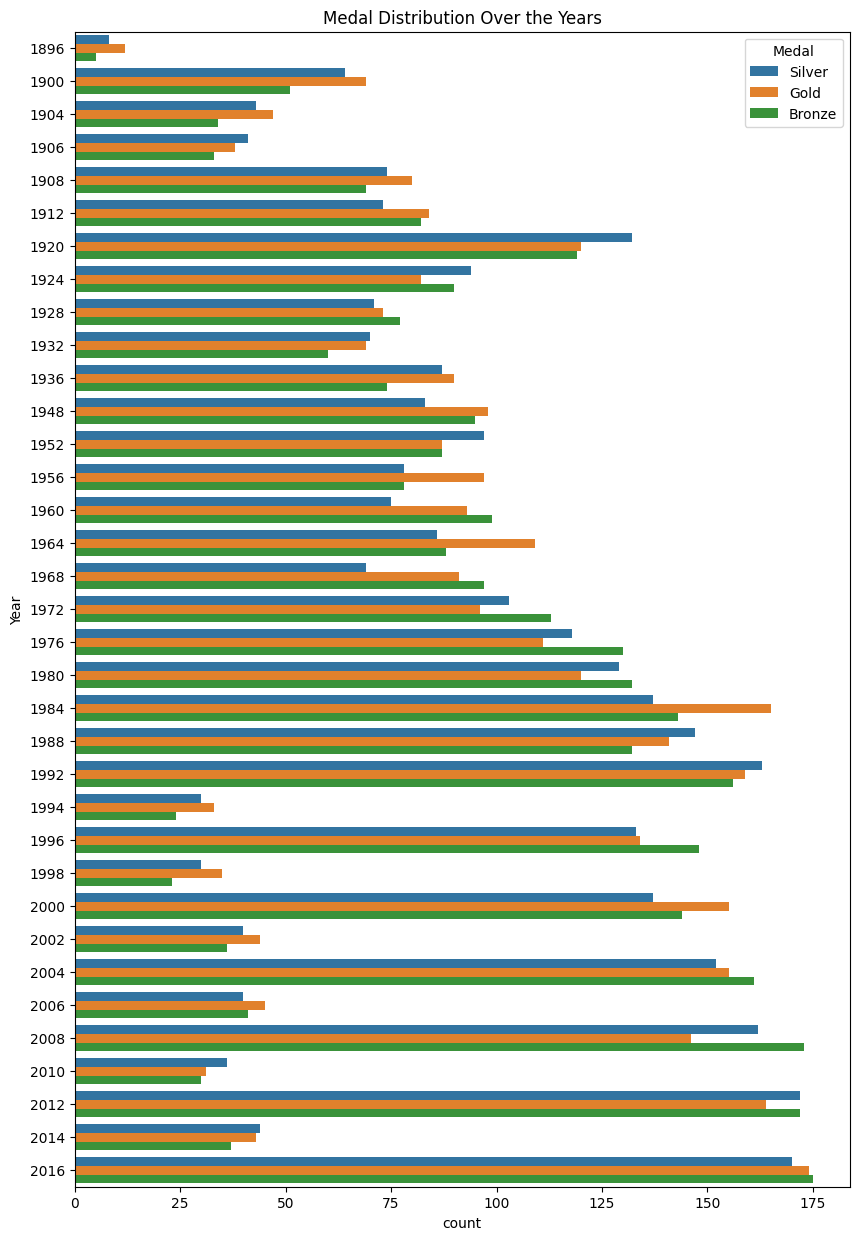

In [17]:
plt.figure(figsize=(10,15))
sns.countplot(data=df,y='Year',hue='Medal')
plt.title('Medal Distribution Over the Years')
plt.show()

In [18]:
year_age=df.groupby('Year')['Age'].mean()
year_age

Year
1896    23.029412
1900    29.119883
1904    27.063241
1906    26.989474
1908    27.000000
1912    27.965552
1920    29.241135
1924    28.252267
1928    27.973564
1932    29.606987
1936    27.245665
1948    28.363170
1952    26.273684
1956    26.316156
1960    25.136156
1964    24.852107
1968    24.316722
1972    24.126448
1976    23.656820
1980    23.312364
1984    24.060328
1988    24.257374
1992    24.637827
1994    24.487516
1996    25.338210
1998    25.143860
2000    25.435177
2002    26.029095
2004    25.780111
2006    26.091716
2008    25.685148
2010    26.150776
2012    25.993485
2014    26.082814
2016    26.259592
Name: Age, dtype: float64

In [19]:
sport_height=df.groupby('Sport')['Height'].max()
sport_height.sort_values(ascending=False)

Sport
Basketball             223.0
Volleyball             215.0
Handball               214.0
Judo                   213.0
Beach Volleyball       210.0
                       ...  
Military Ski Patrol      NaN
Motorboating             NaN
Polo                     NaN
Racquets                 NaN
Roque                    NaN
Name: Height, Length: 65, dtype: float64

In [20]:
country_gender=df.groupby(['NOC','Sex'])['ID'].count()
print(country_gender)

NOC  Sex
AFG  M       38
AHO  F        6
     M       27
ALB  F        4
     M        7
           ... 
YUG  M      455
ZAM  F        3
     M       40
ZIM  F       41
     M       47
Name: ID, Length: 432, dtype: int64


In [21]:
country_gold_medal=df[df['Medal']=='Gold'].groupby('NOC')['Medal'].count()
print(country_gold_medal)

NOC
ALG      1
ANZ      7
ARG     25
ARM      1
AUS     98
      ... 
URU     13
USA    747
UZB      4
YUG     31
ZIM      7
Name: Medal, Length: 84, dtype: int64


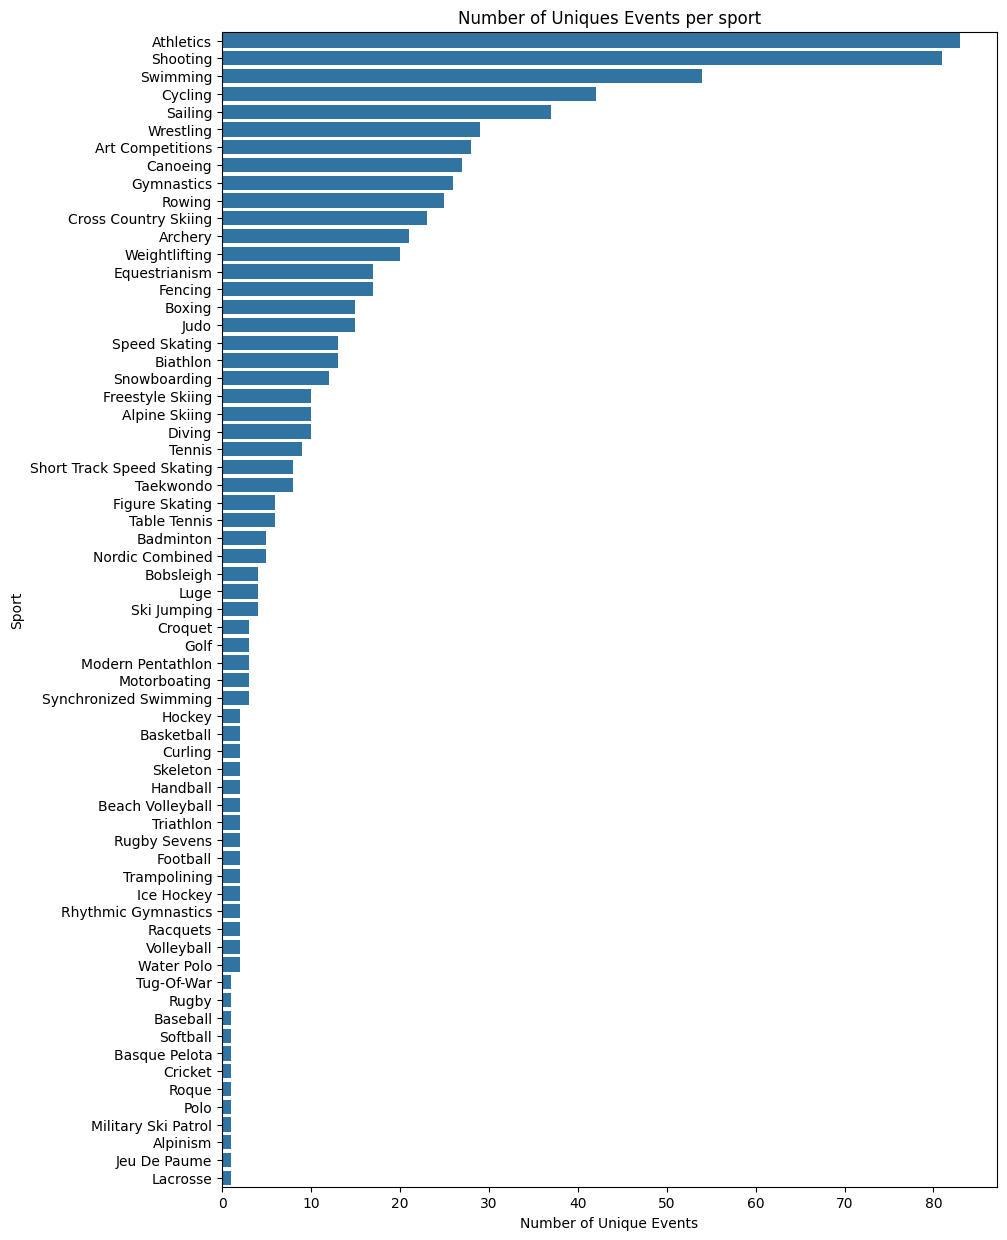

In [22]:
sport_event_count=df.groupby('Sport')['Event'].nunique().sort_values(ascending=False)
plt.figure(figsize=(10,15))
sns.barplot(data=pd.DataFrame(sport_event_count),x='Event',y='Sport')
plt.title("Number of Uniques Events per sport")
plt.ylabel("Sport")
plt.xlabel("Number of Unique Events")
plt.show()

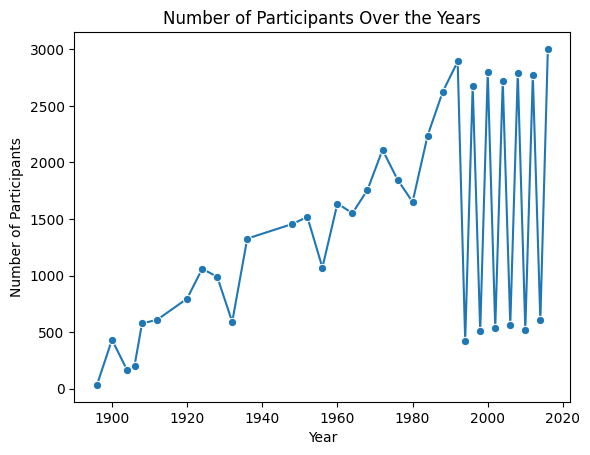

In [23]:
year_participants_count=df.groupby('Year')['ID'].nunique()
sns.lineplot(data=year_participants_count,marker='o')
plt.title('Number of Participants Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.show()

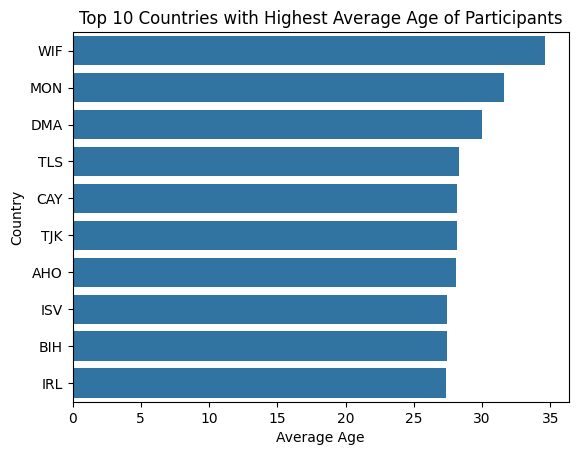

In [24]:
country_avg_age=df.groupby('NOC')['Age'].mean().sort_values(ascending=False)
d=country_avg_age.head(10)
sns.barplot(data=pd.DataFrame(d),y='NOC',x='Age')
plt.title('Top 10 Countries with Highest Average Age of Participants')
plt.ylabel('Country')
plt.xlabel("Average Age")
plt.show()

In [25]:
most_medals_country=df['NOC'].value_counts().idxmax()
print("Most Medal-Winning Country: ",most_medals_country)

Most Medal-Winning Country:  USA


In [26]:
tallest_athelete =df[df['Height']==df['Height'].max()]
print("Tallest Athelete:",tallest_athelete[['ID','Name','Height','Sport']])

Tallest Athelete:           ID                  Name  Height       Sport
32376  16639  Tommy Loren Burleson   223.0  Basketball


In [27]:
heaviest_athelete =df[df['Weight']==df['Weight'].max()]
print("Heaviest Athelete:",heaviest_athelete[['ID','Name','Weight','Sport']])

Heaviest Athelete:           ID               Name  Weight Sport
23155  12177  Ricardo Blas, Jr.   214.0  Judo
23156  12177  Ricardo Blas, Jr.   214.0  Judo


In [32]:
a=sorted(df['Year'].unique())
a

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]